#### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_absolute_error,accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from xgboost import XGBClassifier

#### Fetch and preprocess data using pipeline

In [2]:
data=pd.read_csv('training.csv')
data=data.iloc[:,:-1]
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [3]:
data.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
temp=data.prognosis.unique()
k=0
m={}
for x in temp:
    m[x]=k
    k+=1

y=data.prognosis.copy()
for i in range(len(y)):
    y[i]=int(m[y[i]])

data.prognosis=y.astype(str).astype(int)

In [5]:
X=data.drop(['prognosis'],axis=1)
y=data['prognosis']
X_train,X_valid,y_train,y_valid=train_test_split(X,y,train_size=0.8,test_size=0.2)
y_valid=y_valid.astype(str).astype(int)

In [6]:
categorical_cols = [cname for cname in X_train.columns if X_train[cname].dtype == "object"]
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]

In [7]:
numerical_transformer=Pipeline(steps=[
    ('impute',SimpleImputer(strategy='constant')),
    ('scale',StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

#### Define model and fit

In [8]:
model=XGBClassifier(use_label_encoder=False)

In [9]:
pipe=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',model)
])

In [10]:
pipe.fit(X_train,y_train)

[20:22:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['itching', 'skin_rash',
                                                   'nodal_skin_eruptions',
                                                   'continuous_sneezing',
                                                   'shivering', 'chills',
                                                   'joint_pain', 'stomach_pain',
                                                   'acidity',
                                                   'ulcers_on_tongue',
                                                   'm

#### Predict and validate

In [11]:
pred=pipe.predict(X_valid)

In [12]:
print("Accuracy: %.2f%%" % (accuracy_score(y_valid,pred) * 100.0))

Accuracy: 100.00%


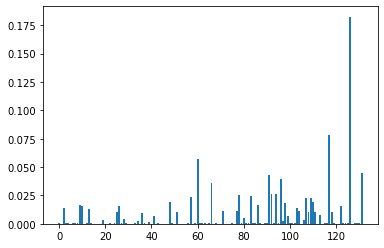

In [13]:
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

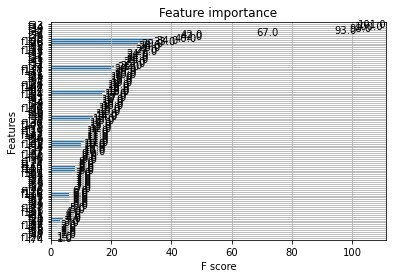

In [14]:
from xgboost import plot_importance
plot_importance(model)
plt.show()

#### Extract optimal parameters using feature selection and validate

In [18]:
good_features=[]
top_fs={}
fs=model.feature_importances_
for i in range(len(fs)):
#     print(X.columns[i],fs[i])
    if fs[i]>fs.mean():
        good_features.append(X.columns[i])
        top_fs[X.columns[i]]=fs[i]

temp=sorted(top_fs.items(), key =
             lambda kv:(kv[1], kv[0])) 
custom_features=[]
for i in range(int(input('Enter number of features:'))):
    custom_features.append(temp[i][0])
custom_features

Enter number of features:34


['pain_behind_the_eyes',
 'blood_in_sputum',
 'receiving_blood_transfusion',
 'rusty_sputum',
 'high_fever',
 'throat_irritation',
 'enlarged_thyroid',
 'slurred_speech',
 'increased_appetite',
 'spotting_ urination',
 'nodal_skin_eruptions',
 'watering_from_eyes',
 'pus_filled_pimples',
 'muscle_wasting',
 'sunken_eyes',
 'unsteadiness',
 'ulcers_on_tongue',
 'altered_sensorium',
 'visual_disturbances',
 'malaise',
 'mucoid_sputum',
 'lack_of_concentration',
 'weakness_in_limbs',
 'movement_stiffness',
 'knee_pain',
 'passage_of_gases',
 'toxic_look_(typhos)',
 'bruising',
 'irritability',
 'continuous_feel_of_urine',
 'yellow_crust_ooze',
 'pain_in_anal_region',
 'fluid_overload.1',
 'silver_like_dusting']

In [ ]:
good_features=custom_features

In [ ]:
opt_X=data[good_features]
opt_X.head()

In [ ]:
opt_X.describe()

In [ ]:
opt_y=data['prognosis']
opt_y

In [ ]:
opt_X_train,opt_X_valid,opt_y_train,opt_y_valid=train_test_split(opt_X,opt_y,test_size=0.2,train_size=0.8)

In [ ]:
model.fit(opt_X_train,opt_y_train)

In [ ]:
opt_pred=model.predict(opt_X_valid)

In [ ]:
print("Accuracy: %.2f%%" % (accuracy_score(opt_y_valid,opt_pred) * 100.0))

#### Final testing

In [ ]:
testing=pd.read_csv('testing.csv')
testing.describe()

In [ ]:
testing.head()

In [ ]:
final_X=data.drop(['prognosis'],axis=1)
final_y=data['prognosis']
result=model.predict(final_X[good_features])

In [ ]:
print("Accuracy: %.2f%%" % (accuracy_score(final_y,result) * 100.0))